


### Not Enough DATA


In [72]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


### Let's create some datapoints. Please note the number of majority and minority classes.

In [73]:
num_majority_class=1000
num_minority_class=150

majority_class_flag=1
minority_class_flag=-1

def generate_data(num_majority_class,num_minority_class):
    np.random.seed(42)
    # multiply by 2 to have higher variance!
    x1=np.random.standard_normal(num_majority_class)*2
    x2=np.random.standard_normal(num_majority_class)*2
    xdata=pd.DataFrame(data=[x1,x2]).transpose()
    xdata=xdata.rename(index=str, columns={0: "x1", 1: "x2"})
    xdata['category']=majority_class_flag
    xdata.head()

    # multiply by a number under 1 to have less variance!
    # multiply by a number above 1 to have more variance!
    x1=np.random.standard_normal(num_minority_class)*1.0+2.5
    x2=np.random.standard_normal(num_minority_class)*1.0+2.5
    y2=np.full(num_minority_class,minority_class_flag)
    cat2=pd.DataFrame(data=[x1,x2,y2]).transpose()
    cat2=cat2.rename(index=str, columns={0: "x1", 1: "x2", 2:"category"})
    xdata=xdata.append(cat2)
    xdata=xdata.reset_index(drop=True)
    return xdata

xdata=generate_data(num_majority_class,num_minority_class)


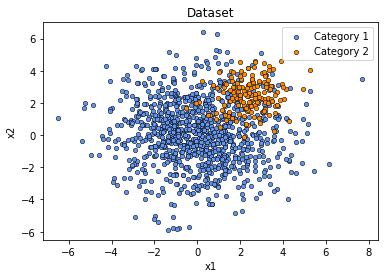

In [74]:

def plot_data_points(plotdatax):
    ax = plotdatax[plotdatax['category']==majority_class_flag].plot.scatter(x="x1",y="x2", color='cornflowerblue',edgecolor='black', linewidth='0.5',marker="o",s=20, label='Category 1');
    plotdatax[plotdatax['category']==minority_class_flag].plot.scatter(x="x1",y="x2", color='darkorange',edgecolor='black', linewidth='0.5', label='Category 2',s=20, ax=ax);
    return ax
plot_data_points(xdata)
plt.title("Dataset")
plt.show()

### Create Train and Eval set

In [75]:

data=xdata.copy()
y=data.pop('category')
X=data
x_train, x_eval, y_train, y_eval = train_test_split(X,y,test_size=0.3, random_state = 42)
    


## Let's solve this first with Tensorflow Linear SVM
Lets create the loss function with tensorflow graph so later we can modify it. 


### Create Placeholders and Variables

In [76]:
import tensorflow as tf
tf.reset_default_graph()
ph_xdata = tf.placeholder(shape=[None,2],dtype=tf.float32)
ph_ytrue = tf.placeholder(shape=[None,1],dtype=tf.float32)

A = tf.get_variable("A", dtype=tf.float32,initializer=tf.constant([[23.],[ 42.]]))
b = tf.get_variable("b", dtype=tf.float32,initializer=tf.constant([[-1.]]))


In [77]:

l2_norm=tf.reduce_sum(tf.square(A))
alpha=tf.constant([0.1])
model_output=tf.subtract(tf.matmul(ph_xdata,A),b)
class_term=tf.reduce_mean(tf.maximum(0.0,tf.subtract(1.0,tf.multiply(model_output,ph_ytrue))))
loss_candidate1=tf.add(class_term,tf.multiply(alpha,l2_norm))
prediction = tf.sign(model_output)


In [78]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step = optimizer.minimize(loss_candidate1)

In [79]:
#init = tf.global_variables_initializer()
with tf.Session() as sess:
    
    #sess.run(init)
    sess.run(A.initializer)
    sess.run(b.initializer)
    
    epochs = 10000
    loss_vec=[]
    for i in range(epochs):
        
        sess.run(train_step,feed_dict={ph_xdata : x_train,ph_ytrue:np.transpose([y_train]) })
        temp_loss=sess.run(loss_candidate1,feed_dict={ph_xdata : x_train,ph_ytrue:np.transpose([y_train]) })
        loss_vec.append(temp_loss)
        if(i%500==0):
            # Fetch Back Results
            [[a1],[a2]] = sess.run(A)
            [[b1]]  = sess.run(b)
            final_slope=-a2/a1
            final_intercept=b1/a1
            print(temp_loss,final_slope,final_intercept)
    # Fetch Back Results
    [[a1],[a2]] = sess.run(A)
    [[b1]]  = sess.run(b)


[279.0091] -1.8262209 -0.043700904
[35.108078] -1.9638411 -0.3676791
[2.393303] -3.1069953 -5.3906884
[0.3025454] -0.68223053 4.837928
[0.29094043] -0.86682063 5.0580096
[0.2847909] -0.8920696 5.1542554
[0.2802627] -0.89591044 5.2195
[0.27701932] -0.8789376 5.2388816
[0.2746697] -0.87570226 5.317283
[0.27282882] -0.8966402 5.453124
[0.2715162] -0.90087426 5.609464
[0.2705378] -0.9198747 5.7376266
[0.2698143] -0.92678595 5.892076
[0.2692849] -0.94421357 6.0094748
[0.26889074] -0.9604324 6.141407
[0.2686149] -0.9642466 6.2736464
[0.26842445] -0.96913075 6.388586
[0.26829416] -0.9689746 6.5005565
[0.26820612] -0.96707475 6.580847
[0.26814196] -0.9754472 6.642325


In [80]:
final_slope=-a2/a1
final_intercept=b1/a1

print(final_slope)
print(final_intercept)


-0.9774165
6.7140236


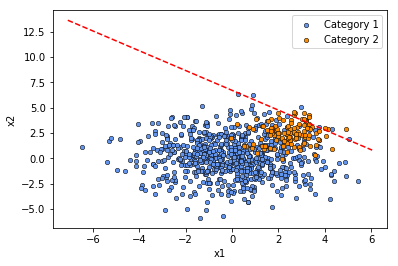

In [81]:
def abline(ax,slope, intercept):
    """Plot a line from slope and intercept"""
    axes = ax#plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',color='r')
    

plotdatax=x_train.copy()
plotdatax['category']=y_train

ax=plot_data_points(plotdatax)
abline(ax,final_slope,final_intercept)
plt.show()
